# Note:
**Part 1 Contains :**

*1. Data cleaning & preprocessing*

*2. EDA*

*3. Feature engineering*

**Part 2 Contains Machine Learning Model Building**

# Importing require library for performing EDA, Data Wrangling and data cleaning

# Used Car Price Prediction Project
**With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.**

In [1]:
# Importing Required Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

 * **Importing webdriver**

In [2]:
#Importing the collected data

df = pd.read_csv('used_cars.csv') 

In [3]:
df

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
0,2020,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"30,557 km",PetrolDL-10,1st Owner,"₹9,26,199"
1,2019,Mahindra,XUV 3OO W8(O),Manual,"84,472 km",DieselDL-8C,1st Owner,"₹8,69,999"
2,2019,Mahindra,XUV 3OO 1.5 W6 MT,Manual,"40,883 km",DieselUP-14,1st Owner,"₹8,61,199"
3,2022,Mahindra,XUV 3OO 1.2 W6 AT,NaN,"22,158 km",PetrolDL-1C,1st Owner,"₹10,63,499"
4,2018,Mahindra,KUV 100 NXT K2 D 6S,Manual,"65,179 km",DieselDL-10,1st Owner,"₹4,42,899"
...,...,...,...,...,...,...,...,...
6676,2019,Tata,Harrier XM 2.0L Kryotec,Manual,"49,212 km",DieselHR-26,1st Owner,"₹12,17,599"
6677,2020,Tata,TIGOR XZ 1.2 REVOTRON,Manual,"49,481 km",Petrol + CNGHR-36,1st Owner,"₹6,10,799"
6678,2020,Tata,ALTROZ XZ (O) 1.2 RTN,NaN,"17,554 km",PetrolHR-10,1st Owner,"₹8,14,499"
6679,2020,Tata,Harrier XZ 2.0L Kryotec,Manual,"33,760 km",DieselUP-78,1st Owner,"₹12,52,099"


# EDA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MNF_YEAR     6681 non-null   int64 
 1   BRAND        6681 non-null   object
 2   MODEL        6681 non-null   object
 3   VARIANT      6349 non-null   object
 4   DRIVEN_KM    6681 non-null   object
 5   FUELTYPE     6681 non-null   object
 6   NOOF_OWNERS  6681 non-null   object
 7   PRICE        6681 non-null   object
dtypes: int64(1), object(7)
memory usage: 417.7+ KB


In [5]:
df.isnull().sum().sum()

332

In [6]:
df.isnull().sum()

MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT        332
DRIVEN_KM        0
FUELTYPE         0
NOOF_OWNERS      0
PRICE            0
dtype: int64

**We can see that there are many null values in "Variant" Column**

In [8]:
df.nunique()

MNF_YEAR         14
BRAND            21
MODEL           780
VARIANT           2
DRIVEN_KM      2966
FUELTYPE        447
NOOF_OWNERS       3
PRICE          2562
dtype: int64

In [9]:
df.FUELTYPE.unique()

array(['PetrolDL-10', 'DieselDL-8C', 'DieselUP-14', 'PetrolDL-1C',
       'DieselDL-10', 'PetrolDL-8C', 'DieselUP-53', 'DieselUP-32',
       'PetrolHR-21', 'PetrolHR-10', 'DieselUP-44', 'DieselHR-10',
       'DieselUP-78', 'DieselUP-74', 'DieselHR-51', 'PetrolDL-3C',
       'PetrolUP-16', 'PetrolDL-7C', 'PetrolDL-2C', 'DieselDL-12',
       'PetrolUP-53', 'PetrolUP-65', 'DieselDL-3C', 'DieselHR-26',
       'PetrolDL-6C', 'PetrolHR-26', 'PetrolUP-14', 'PetrolDL-11',
       'PetrolDL-14', 'DieselDL-11', 'PetrolDL-5C', 'PetrolHR-19',
       'DieselDL-7C', 'PetrolDL-12', 'PetrolDL-4C', 'Petrol + CNGHR-36',
       'PetrolUP-32', 'PetrolHR-98', 'PetrolDL-9C', 'PetrolHR-29',
       'PetrolHR-14', 'PetrolHR-50', 'DieselDL-6C', 'PetrolUP-78',
       'Petrol + CNGHR-10', 'PetrolHR-11', 'Petrol + CNGHR-98',
       'PetrolHR-04', 'PetrolHR-13', 'PetrolHR-51', 'Petrol + CNGUP-14',
       'Petrol + CNGDL-3C', 'PetrolHR-72', 'PetrolUP-27',
       'Petrol + CNGDL-12', 'Petrol + CNGDL-14', 'Petrol + CNG

In [10]:
FUEL=[]
for i in df.FUELTYPE:
    size=len(i)
    FUEL.append(i[:size-5])

In [11]:
len(FUEL) , len(df.FUELTYPE)

(6681, 6681)

In [12]:
df=df.assign(FUEL=FUEL)

In [13]:
df=df.drop(['FUELTYPE'],axis=1)

In [14]:
df

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,NOOF_OWNERS,PRICE,FUEL
0,2020,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"30,557 km",1st Owner,"₹9,26,199",Petrol
1,2019,Mahindra,XUV 3OO W8(O),Manual,"84,472 km",1st Owner,"₹8,69,999",Diesel
2,2019,Mahindra,XUV 3OO 1.5 W6 MT,Manual,"40,883 km",1st Owner,"₹8,61,199",Diesel
3,2022,Mahindra,XUV 3OO 1.2 W6 AT,NaN,"22,158 km",1st Owner,"₹10,63,499",Petrol
4,2018,Mahindra,KUV 100 NXT K2 D 6S,Manual,"65,179 km",1st Owner,"₹4,42,899",Diesel
...,...,...,...,...,...,...,...,...
6676,2019,Tata,Harrier XM 2.0L Kryotec,Manual,"49,212 km",1st Owner,"₹12,17,599",Diesel
6677,2020,Tata,TIGOR XZ 1.2 REVOTRON,Manual,"49,481 km",1st Owner,"₹6,10,799",Petrol + CNG
6678,2020,Tata,ALTROZ XZ (O) 1.2 RTN,NaN,"17,554 km",1st Owner,"₹8,14,499",Petrol
6679,2020,Tata,Harrier XZ 2.0L Kryotec,Manual,"33,760 km",1st Owner,"₹12,52,099",Diesel


In [15]:
df.rename(columns = {'FUEL':'FUELTYPE'}, inplace = True)


In [16]:
df

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,NOOF_OWNERS,PRICE,FUELTYPE
0,2020,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"30,557 km",1st Owner,"₹9,26,199",Petrol
1,2019,Mahindra,XUV 3OO W8(O),Manual,"84,472 km",1st Owner,"₹8,69,999",Diesel
2,2019,Mahindra,XUV 3OO 1.5 W6 MT,Manual,"40,883 km",1st Owner,"₹8,61,199",Diesel
3,2022,Mahindra,XUV 3OO 1.2 W6 AT,NaN,"22,158 km",1st Owner,"₹10,63,499",Petrol
4,2018,Mahindra,KUV 100 NXT K2 D 6S,Manual,"65,179 km",1st Owner,"₹4,42,899",Diesel
...,...,...,...,...,...,...,...,...
6676,2019,Tata,Harrier XM 2.0L Kryotec,Manual,"49,212 km",1st Owner,"₹12,17,599",Diesel
6677,2020,Tata,TIGOR XZ 1.2 REVOTRON,Manual,"49,481 km",1st Owner,"₹6,10,799",Petrol + CNG
6678,2020,Tata,ALTROZ XZ (O) 1.2 RTN,NaN,"17,554 km",1st Owner,"₹8,14,499",Petrol
6679,2020,Tata,Harrier XZ 2.0L Kryotec,Manual,"33,760 km",1st Owner,"₹12,52,099",Diesel


In [17]:
df.MNF_YEAR.unique()

array([2020, 2019, 2022, 2018, 2021, 2016, 2017, 2014, 2013, 2015, 2010,
       2012, 2011, 2009], dtype=int64)

In [19]:
df.BRAND.unique()

array(['Mahindra', 'Tata', 'Hyundai', 'Honda', 'Ford', 'Maruti', 'MG',
       'Toyota', 'Renault', 'KIA', 'Skoda', 'Volkswagen', 'Datsun',
       'Mercedes', 'Audi', 'Jaguar', 'Jeep', 'MARUTI', 'Nissan', 'BMW',
       'SKODA'], dtype=object)

In [20]:
df.VARIANT.unique()

array([nan, 'Manual', 'Automatic'], dtype=object)

In [21]:
df.NOOF_OWNERS.unique()

array(['1st Owner', '2nd Owner', '3rd Owner'], dtype=object)

In [22]:
df.duplicated().sum()

3665

In [23]:
#Because we have too many duplicate records we will detete them to have a good model

df = df.drop_duplicates()

In [24]:
df.shape

(3016, 8)

**From above we can see that the only in VARIANT we have values missing so we will change VARIANT nan values as NOT MENTIONED**



In [25]:
df['VARIANT'] = df['VARIANT'].fillna('NOT MENTIONED')

In [26]:
df.isnull().sum()

MNF_YEAR       0
BRAND          0
MODEL          0
VARIANT        0
DRIVEN_KM      0
NOOF_OWNERS    0
PRICE          0
FUELTYPE       0
dtype: int64

# Lable Encoding


In [27]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [28]:
DF = df.copy()

In [29]:
catagorical_data = [ 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'FUELTYPE' , 'NOOF_OWNERS' ]

for i in catagorical_data:
    DF[i]=DF[i].astype('str')
    DF[i]=LE.fit_transform(DF[i])

In [30]:
DF['PRICE'] = DF['PRICE'].str.replace(r'\D', '').astype(int)
DF['DRIVEN_KM'] = DF['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

In [31]:
DF

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,NOOF_OWNERS,PRICE,FUELTYPE
0,11,11,722,2,30557,0,926199,1
1,10,11,731,1,84472,0,869999,0
2,10,11,724,1,40883,0,861199,0
3,13,11,721,2,22158,0,1063499,1
4,9,11,378,1,65179,0,442899,0
...,...,...,...,...,...,...,...,...
6145,12,12,530,1,15467,0,458749,1
6163,6,5,251,1,64355,1,478199,1
6164,10,12,457,1,14049,0,494799,1
6165,9,5,260,1,61579,0,338599,1


In [32]:
DF.describe()

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,NOOF_OWNERS,PRICE,FUELTYPE
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3.016000e+03,3016.000000
mean,8.912798,10.362069,353.355106,0.851459,40782.460875,0.226790,7.497534e+05,0.861074
std,2.454634,4.864759,238.115787,0.486451,26159.452216,0.450124,3.659718e+05,0.478662
min,0.000000,0.000000,0.000000,0.000000,167.000000,0.000000,1.350990e+05,0.000000
25%,8.000000,5.000000,136.000000,1.000000,19302.250000,0.000000,4.872740e+05,1.000000
50%,9.000000,12.000000,321.000000,1.000000,37102.500000,0.000000,6.574990e+05,1.000000
75%,11.000000,12.000000,582.000000,1.000000,58932.000000,0.000000,9.251615e+05,1.000000
max,13.000000,20.000000,779.000000,2.000000,242614.000000,2.000000,3.237699e+06,2.000000


In [33]:
DF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 0 to 6258
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   MNF_YEAR     3016 non-null   int32
 1   BRAND        3016 non-null   int32
 2   MODEL        3016 non-null   int32
 3   VARIANT      3016 non-null   int32
 4   DRIVEN_KM    3016 non-null   int32
 5   NOOF_OWNERS  3016 non-null   int32
 6   PRICE        3016 non-null   int32
 7   FUELTYPE     3016 non-null   int32
dtypes: int32(8)
memory usage: 117.8 KB


Now it our all columns are of Dtype are of "int32" , and we do not have any NULL values .

Hence we can see that our data is proper and ready for ML Models

In [34]:
DF.FUELTYPE.unique().sum()

3

# Correlation of the Data


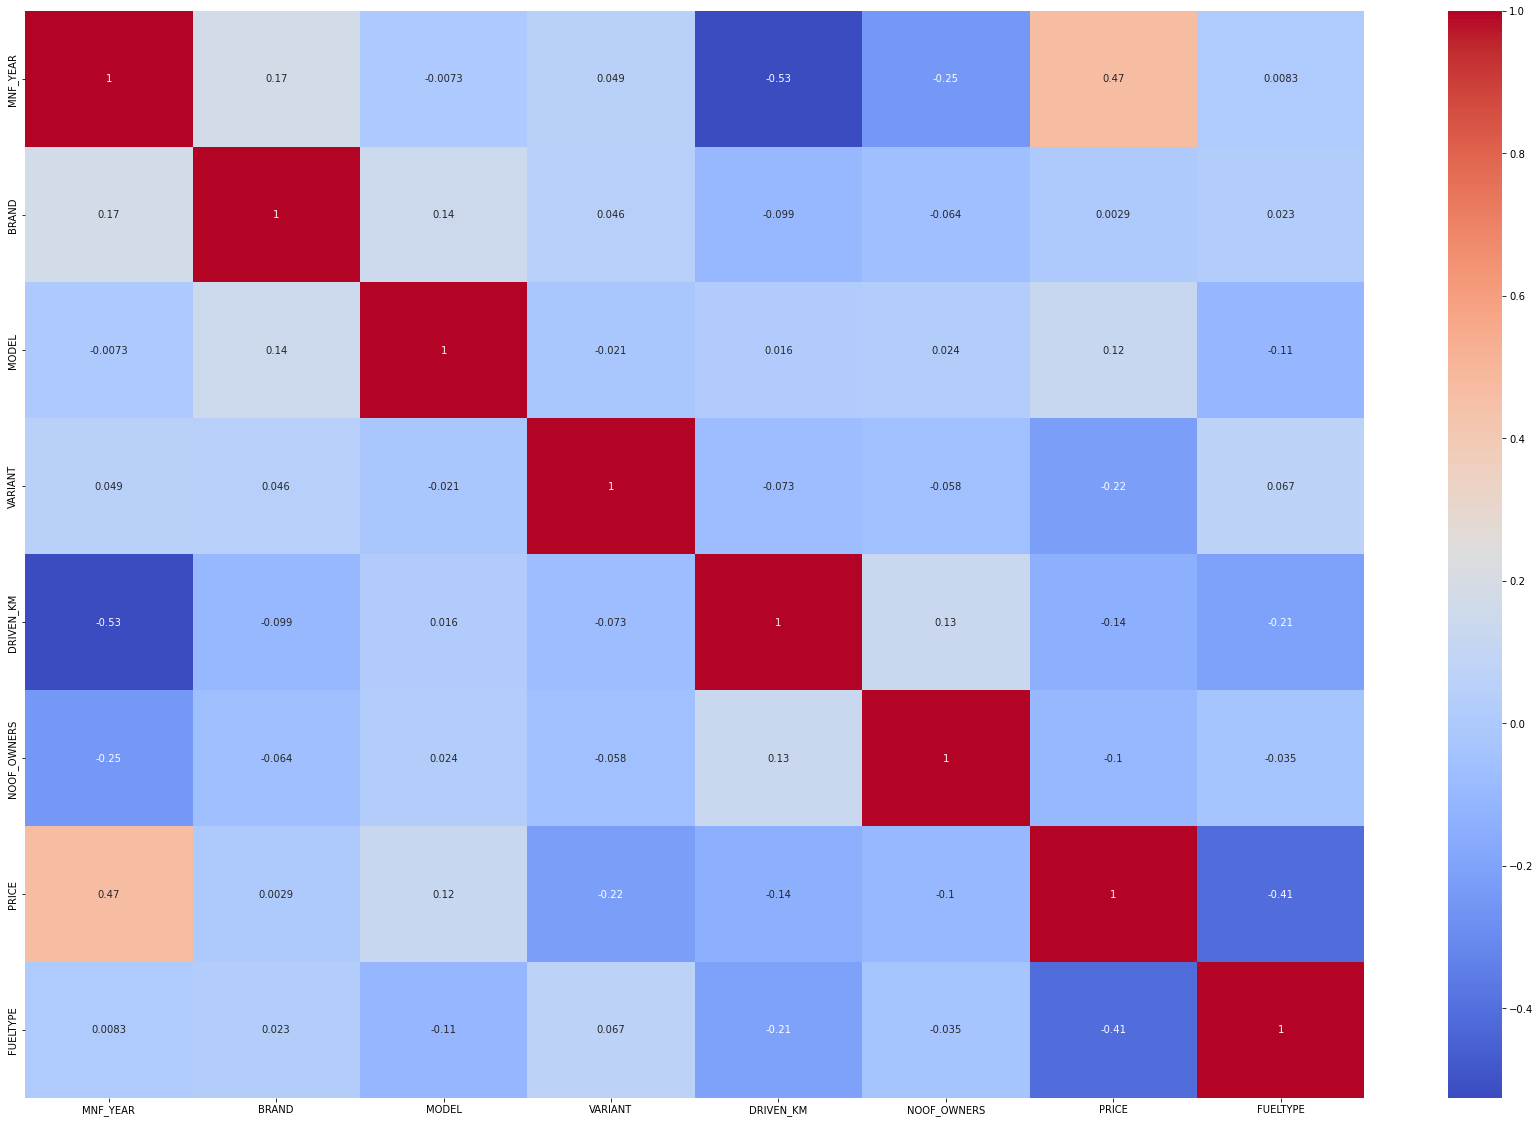

In [35]:
plt.figure(figsize=(30,20))
sns.heatmap(DF.corr(), annot = True, cmap= "coolwarm")
plt.show()

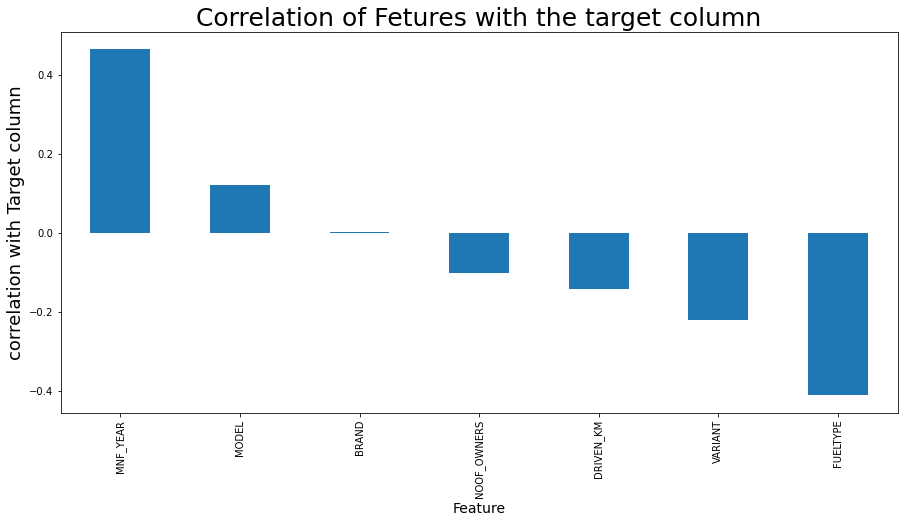

KEY OBSERVATIONS:
 


,PRICE
MNF_YEAR,0.465634
MODEL,0.123232
BRAND,0.002859
NOOF_OWNERS,-0.100897
DRIVEN_KM,-0.142599
VARIANT,-0.220347
FUELTYPE,-0.410488


In [36]:
plt.figure(figsize=(15,7))
DF.corr()["PRICE"].sort_values(ascending=False).drop(["PRICE"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(DF.corr()["PRICE"].sort_values(ascending=False)).drop(["PRICE"])
print("KEY OBSERVATIONS:\n ")
cor

**From above we can clearly see that MNF_YEAR is postivly correlated to PRICE.**

**Whereas, FUEL_TYPE and VARIENT is negative corelated to PRICE**

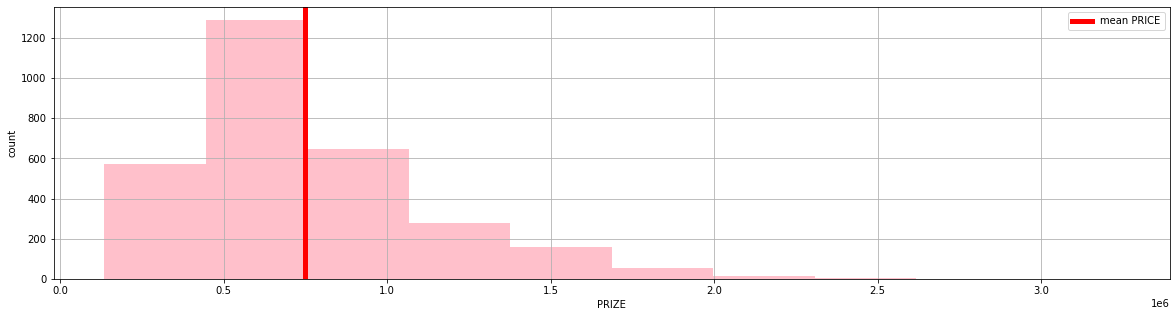

MATHEMATICAL SUMMARY OF PRIZE :
 count    3.016000e+03
mean     7.497534e+05
std      3.659718e+05
min      1.350990e+05
25%      4.872740e+05
50%      6.574990e+05
75%      9.251615e+05
max      3.237699e+06
Name: PRICE, dtype: float64


In [37]:
DF.PRICE.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.PRICE), linewidth = 5, color = "red", label = "mean PRICE")
plt.xlabel("PRIZE")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.PRICE.describe())

Mean of the prize is Rs:7497534 , the prize is distributed between Rs:1350990 to Rs: 3237699.

Above we can understand that most of the Car price is leser than the Mean i.e Rs:7497000.

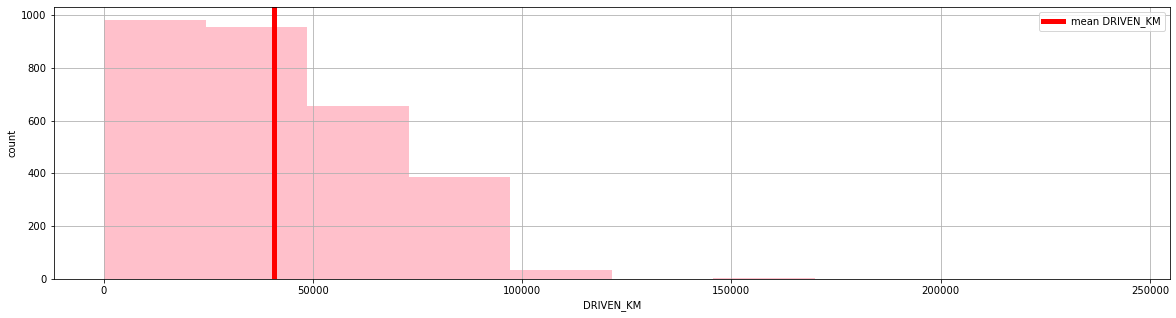

MATHEMATICAL SUMMARY OF PRIZE :
 count      3016.000000
mean      40782.460875
std       26159.452216
min         167.000000
25%       19302.250000
50%       37102.500000
75%       58932.000000
max      242614.000000
Name: DRIVEN_KM, dtype: float64


In [38]:
DF.DRIVEN_KM.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.DRIVEN_KM), linewidth = 5, color = "red", label = "mean DRIVEN_KM")
plt.xlabel("DRIVEN_KM")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.DRIVEN_KM.describe())

Mean of the DRIVEN_KM is 40782.46kms and the maximum KMS driven is 242614.00kms.

Above we can understand that most of the Car comes to sellimg around low kilometers driven.

In [39]:
DF1 = df.copy()


In [40]:
DF1['PRICE'] = DF1['PRICE'].str.replace(r'\D', '').astype(int)
DF1['DRIVEN_KM'] = DF1['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

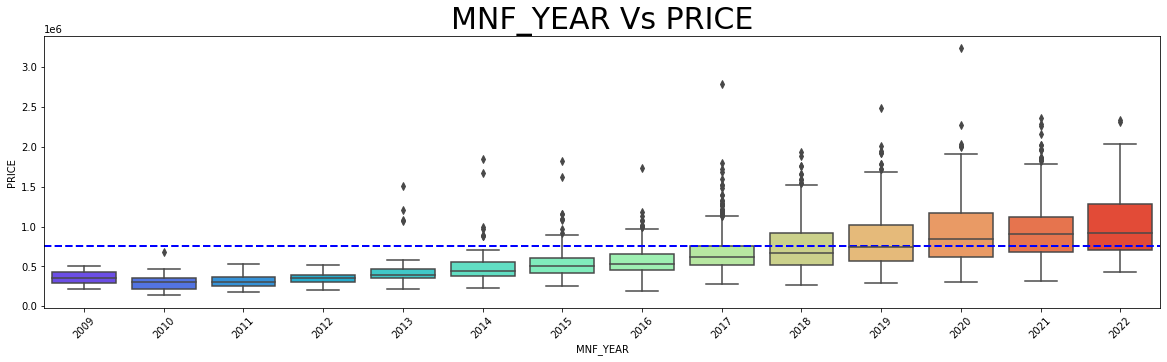

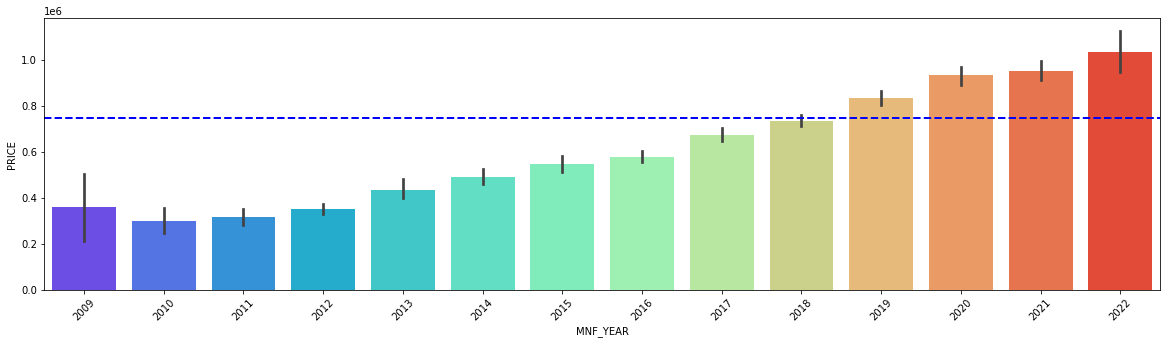

In [41]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("MNF_YEAR Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

**2019, 2020, 2021 , 2022 model are being sold higher in PRICE and also above average PRICE.**



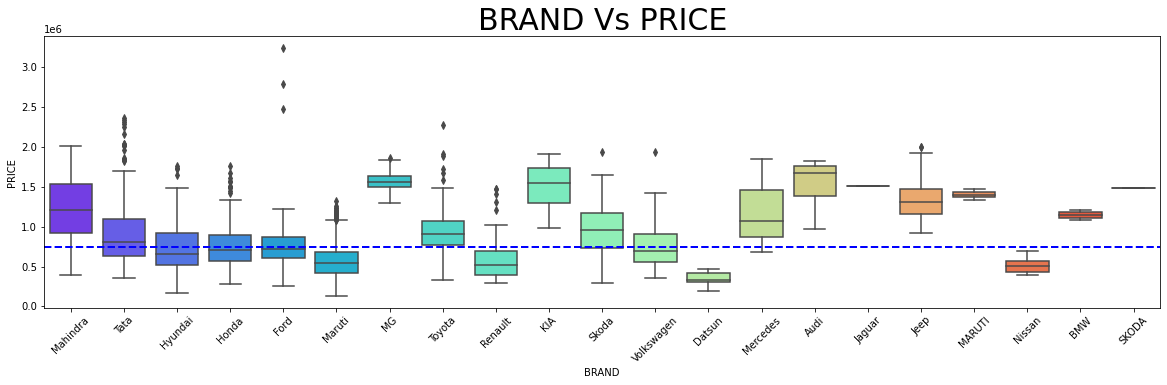

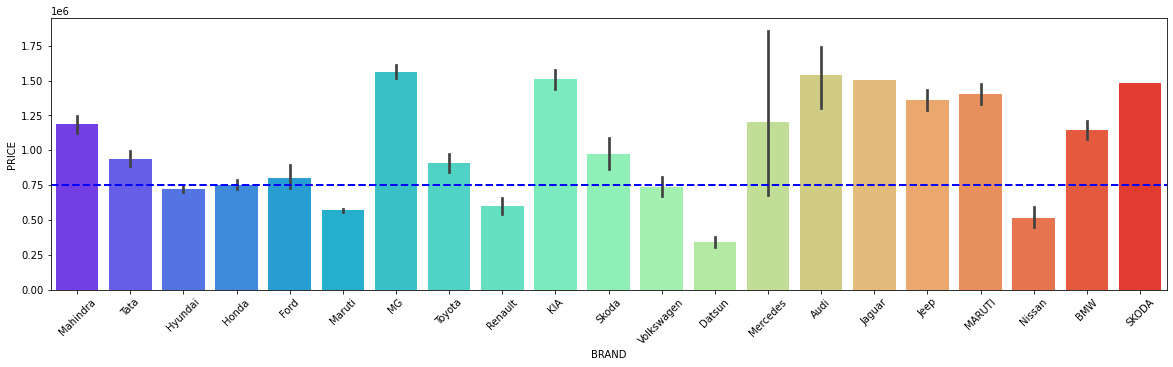

In [42]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("BRAND Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

**When comes to the Brand MG and Audi are being the costliest in country followed by the likes of BMW , KIA , Jeep etc .**



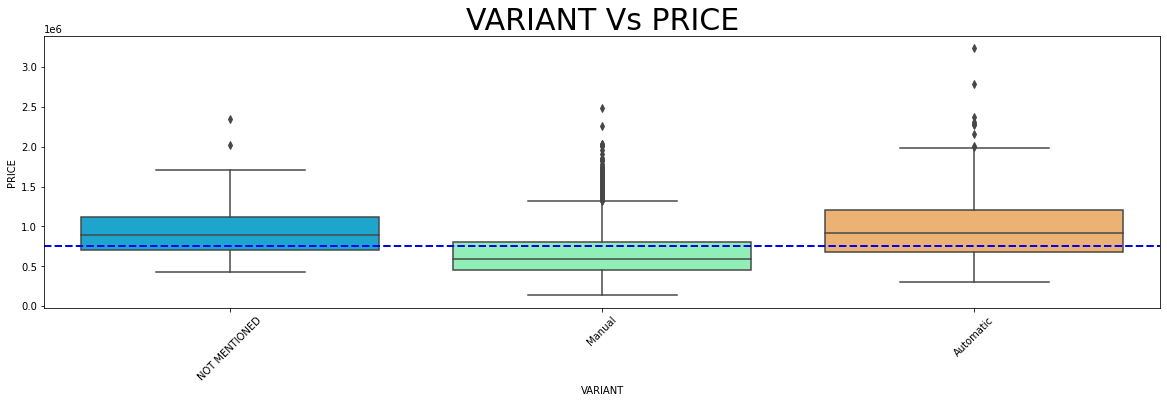

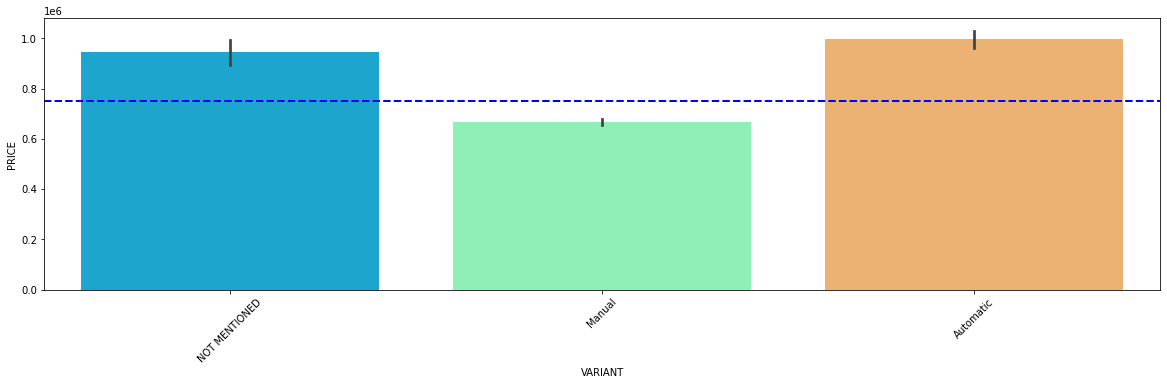

In [43]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("VARIANT Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

**We can see that the automatic engines are costliest in the market. And also most costilier cars comes in Automatic Drift.**



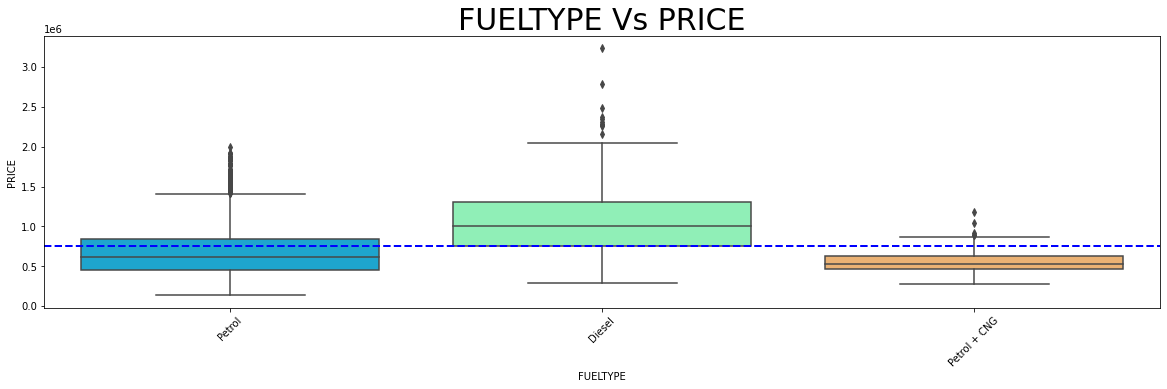

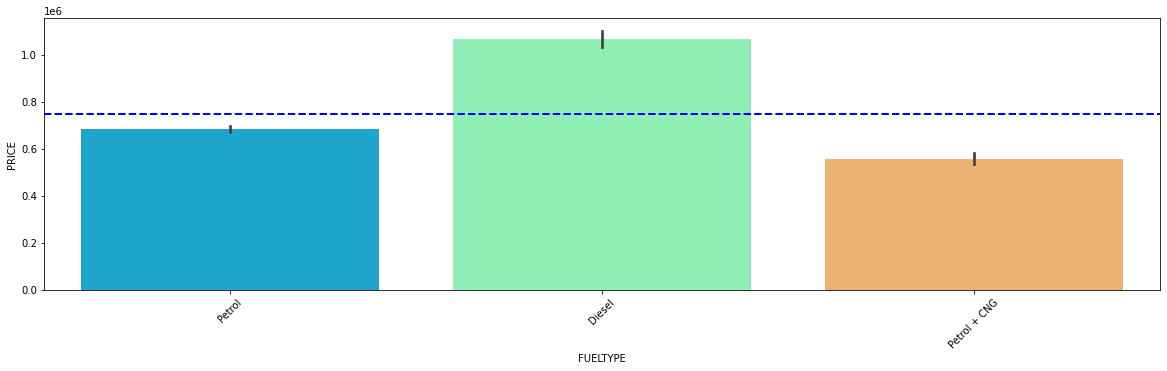

In [44]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("FUELTYPE Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

**Diesel being the chepeast and most efficient fuel type, and so the Desiel engines are being the costiliest fuel types.**

**Petrol bend second prefered followed by CNG and LPG fuel types.**

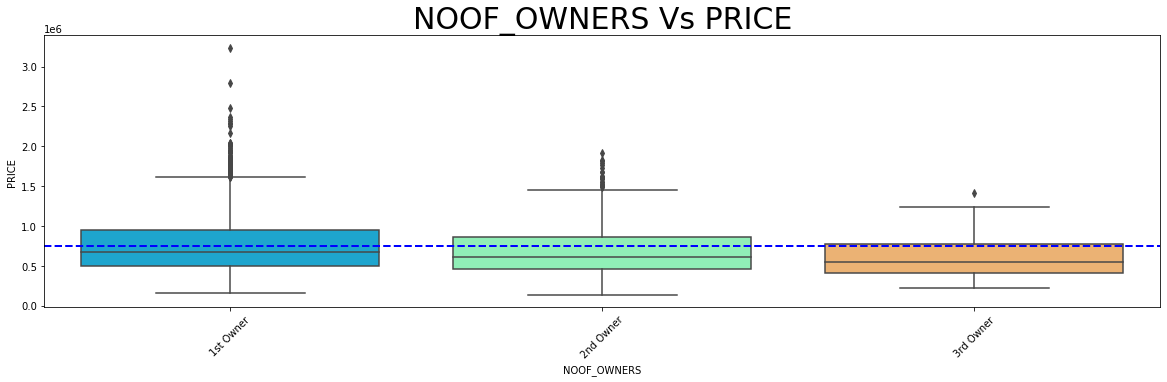

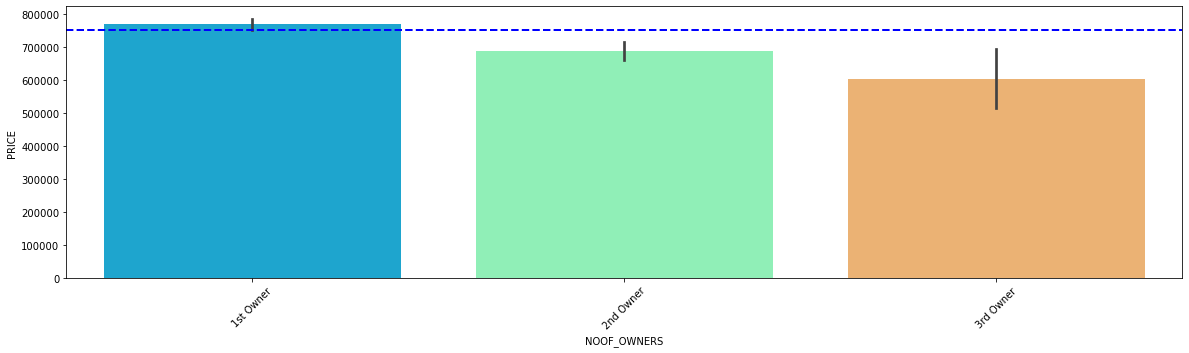

In [45]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "NOOF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("NOOF_OWNERS Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "NOOF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

**1st owner cars are costilest followed by second and third.**

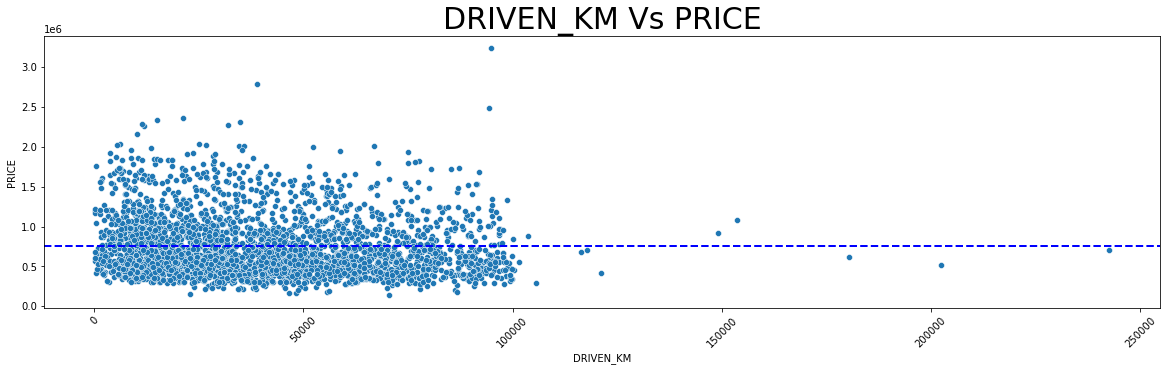

In [46]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.scatterplot(x = 'DRIVEN_KM',y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("DRIVEN_KM Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

**The lesser kms driven are evidently sold costilier.**

# Data Pre-Processing.


**Lets observe the skewness and outliers in the Data.**


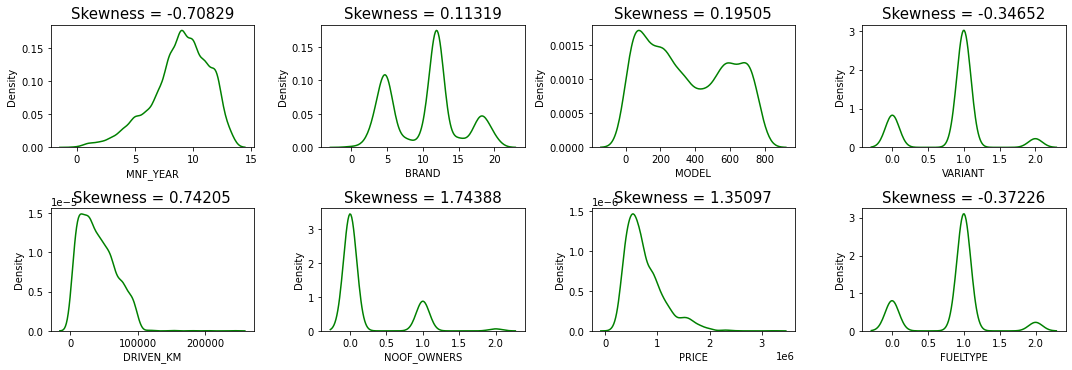

In [48]:
plt.figure(figsize=(15,15))
for i in range (0, len(DF.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(DF[DF.columns[i]], color = "green")
    plt.title(f"Skewness = {round(DF[DF.columns[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

**Lets also see the Outliers mathematically.**



In [49]:
from scipy.stats import zscore

z= np.abs(zscore(DF))
threshold= 3
df_new = DF[(z < 3).all(axis=1)]

In [50]:
print(f"Orginal Data {DF.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((8308-7765)/8308)*100}%")


Orginal Data (3016, 8)
After Removing outliers (2915, 8)
The percentage of data loss 6.535869041887338%


**We have many outliers and we also have skewness in the data. Because its more, correcting them will have loss in the data orr data will be deformed. So we are deciding to work with the same.**

In [51]:
x_1=DF.drop(["PRICE"], axis = 1)
y_1=DF.PRICE

In [52]:
x_1

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,NOOF_OWNERS,FUELTYPE
0,11,11,722,2,30557,0,1
1,10,11,731,1,84472,0,0
2,10,11,724,1,40883,0,0
3,13,11,721,2,22158,0,1
4,9,11,378,1,65179,0,0
...,...,...,...,...,...,...,...
6145,12,12,530,1,15467,0,1
6163,6,5,251,1,64355,1,1
6164,10,12,457,1,14049,0,1
6165,9,5,260,1,61579,0,1


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x_1)

# Model Building


# Selecting parameters for training


In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 50.19467554808169 found on randomstate 485


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)


In [56]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Shortlisting the best model


In [58]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]


In [59]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]


for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.4307088099599833

ERROR:
MEAN ABSOLUTE ERROR:  191412.5679569157
MEAN SQUARED ERROR:  63114394270.16692
ROOT MEAN SQUARED ERROR : 251225.78345020028
R2 SCORE:  0.5019467554808169
**********************************************************************************************************



Score of Lasso() is: 0.4307088098965648

ERROR:
MEAN ABSOLUTE ERROR:  191412.49323593816
MEAN SQUARED ERROR:  63114463152.65652
ROOT MEAN SQUARED ERROR : 251225.92054295776
R2 SCORE:  0.5019462119099274
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.4307087098275675

ERROR:
MEAN ABSOLUTE ERROR:  191405.60933908544
MEAN SQUARED ERROR:  63116409401.116615
ROOT MEAN SQUARED ERROR : 251229.79401559167
R2 SCORE:  0.5019308535218544
**********************************************************************************************************



Score of ElasticNet() is: 

In [61]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [0.4452472  0.41406    0.47391034 0.47892728 0.36560946]
MEAN OF SCORE is : 0.43555085673124105
Standard Deviation : 0.04195387575401135
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [0.44524777 0.41406055 0.47391095 0.47892673 0.36560895]
MEAN OF SCORE is : 0.4355509886037724
Standard Deviation : 0.041954016147504075
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [0.44527402 0.41412261 0.47394456 0.47889415 0.36558399]
MEAN OF SCORE is : 0.43556386663475744
Standard Deviation : 0.04195661623272148
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.40436932 0.40158545 0.42727226 0.40796914 0.31205441]
MEAN OF SC

In [62]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
8,RandomForestRegressor,0.977363,0.833922,0.013724,82928.488873,1.844686e+10,135819.222651,0.854431
6,DecisionTreeRegressor,1.000000,0.742483,0.029480,108654.314324,3.851131e+10,196242.985281,0.696097
5,KNeighborsRegressor,0.799950,0.681957,0.013879,132939.643236,3.710050e+10,192614.889538,0.707230
7,AdaBoostRegressor,0.452898,0.439309,0.053622,218614.367891,6.978904e+10,264176.145332,0.449275
2,Ridge,0.430709,0.435564,0.041957,191405.609339,6.311641e+10,251229.794016,0.501931
1,Lasso,0.430709,0.435551,0.041954,191412.493236,6.311446e+10,251225.920543,0.501946
0,LinearRegression,0.430709,0.435551,0.041954,191412.567957,6.311439e+10,251225.783450,0.501947
3,ElasticNet,0.381628,0.390650,0.040314,199609.585509,7.114330e+10,266727.010924,0.438588
4,SVR,-0.067094,-0.065783,0.024058,269399.673053,1.347099e+11,367028.422512,-0.063033


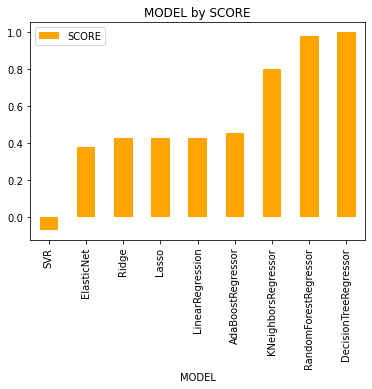

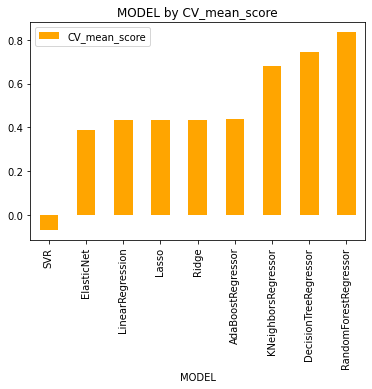

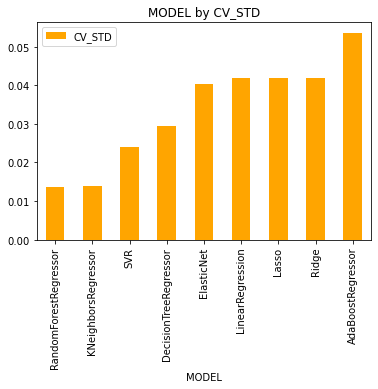

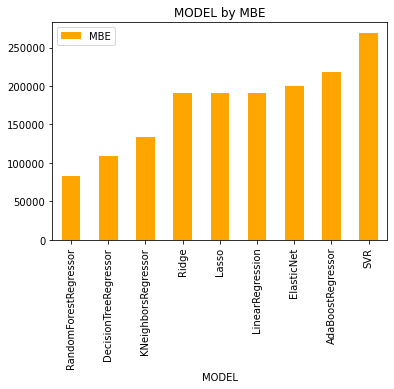

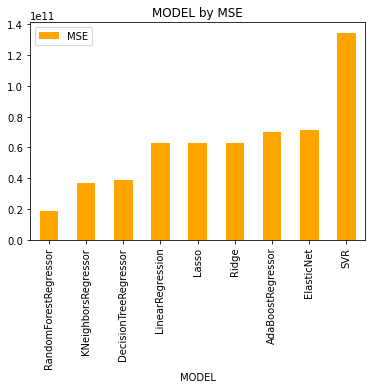

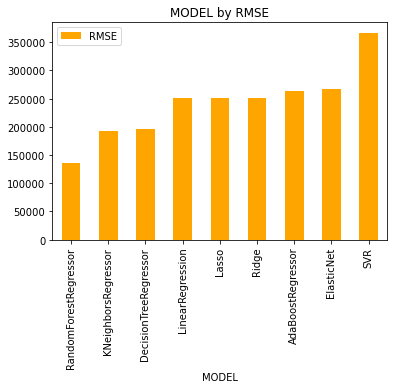

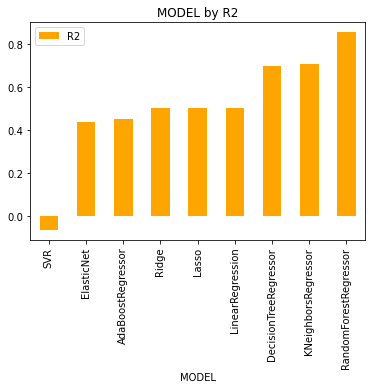

In [63]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

From above observation, we can come to a conclusion that Randomforest is the best model with Score of 98.78 lets try in Hyper tuning the same for improved performance and also to reduce the over fitting the Data.

In [64]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

754973.816755084

In [65]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [66]:
predm=rf.predict(x_test)


In [67]:
predm


array([ 416047.  ,  696175.  ,  666497.  ,  457711.  ,  572234.5 ,
       1027183.5 ,  679465.  ,  521311.  ,  667313.  , 1794027.  ,
        516971.  , 1072444.  ,  525914.99,  403959.  ,  714263.  ,
        799680.5 ,  724131.5 ,  560101.  ,  509518.  ,  956700.  ,
       1042240.  , 1126917.  ,  704165.5 ,  445333.5 ,  688896.5 ,
       1088261.  , 1048659.  , 1209743.8 ,  854209.  ,  938903.5 ,
        464464.5 , 1592381.  ,  698960.  ,  817109.5 ,  644283.  ,
        871148.  ,  603994.5 , 1049535.  ,  800587.  , 1398234.  ,
        597539.  ,  941246.  ,  896342.  ,  656098.5 ,  479815.  ,
        722740.5 , 1331437.  ,  919856.5 ,  895334.5 ,  519730.  ,
       1019751.5 , 1495016.  , 1644001.  ,  541290.  ,  370897.  ,
        488433.  , 1392876.  , 1567059.  ,  518443.8 ,  859464.5 ,
       1398356.5 ,  431294.  , 1348124.  ,  520148.5 ,  549035.2 ,
        467785.5 ,  633806.  ,  598287.  ,  539253.  ,  623185.  ,
        686566.5 ,  329148.  ,  447122.  ,  669876.  ,  228527

In [68]:
rf.score(x_test,y_test), rf.score(x_train,y_train)


(0.8544306857598875, 0.9773626201357989)

In [69]:
rf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Model Evaluation


**Hyper Parameter Tuning.**


In [70]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [71]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}],
             verbose=2)

In [72]:
grid_search.best_estimator_

RandomForestRegressor(criterion='mae', max_features='auto', random_state=42)

In [73]:
reg_final_model = grid_search.best_estimator_

In [74]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_features='auto', random_state=42)

In [75]:
grid_search.best_score_

0.830510142377897

In [76]:
reg_final_model.score(x_train_1,y_train_1), reg_final_model.score(x_test_1,y_test_1)


(0.9451766646816251, 0.9577858581997728)

# Summary and Conclusion :


**We have Hyper parameter tuned the model and improved the model score upto 94% with the Grid search cv score of 83.05%**

**The above model will help our seller to predict the Price of the user cars, and also will helps him to understand based on what factors the the Car Price is decided.**